In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from linearmodels import PanelOLS
import plotly.express as px

sns.set_theme()

In [2]:
path = 'Datasets/' # To be changed if needed

Datasource: https://databrowser.uis.unesco.org/resources/bulk

In [3]:
schooling = pd.read_csv(path+'UNESCO/OPRI_DATA_NATIONAL.zip', dtype={'INDICATOR_ID': 'object'}, compression='zip')  # Upload the schooling data
schooling_labels = pd.read_csv(path+'UNESCO/OPRI_LABEL.csv') # Upload the schooling labels

/var/folders/pl/qxmk8x1d1m586z4_j013bvqw0000gn/T/ipykernel_7575/4168870897.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  schooling = pd.read_csv(path+'UNESCO/OPRI_DATA_NATIONAL.zip', dtype={'INDICATOR_ID': 'object'}, compression='zip')  # Upload the schooling data


In [4]:
SCH = schooling.copy()
SCH['INDICATOR_ID'] = SCH['INDICATOR_ID'].astype(str)
SCH = SCH[SCH['INDICATOR_ID'].str.contains('NART', na=False)] 
SCH = SCH.drop(columns=['MAGNITUDE','QUALIFIER'])
SCH = pd.merge(schooling_labels,SCH,how='left',on='INDICATOR_ID') # Merge the labels with the schooling data
SCH['YEAR'] = pd.to_datetime(SCH['YEAR'], format='%Y',errors='coerce').dt.year 


In [5]:
Primary = SCH[SCH['INDICATOR_ID'].str.contains('NART.1', na=False)] # Filter for primary education
Secondary = SCH[SCH['INDICATOR_ID'].str.contains('NART.2', na=False)] # Filter for secondary education
Tertiary = SCH[SCH['INDICATOR_ID'].str.contains('NART.3', na=False)] # Filter for tertiary education

In [6]:
P = Primary.pivot_table(index=['COUNTRY_ID','YEAR'], columns='INDICATOR_ID', values='VALUE').reset_index()
S = Secondary.pivot_table(index=['COUNTRY_ID','YEAR'], columns='INDICATOR_ID', values='VALUE').reset_index()
T = Tertiary.pivot_table(index=['COUNTRY_ID','YEAR'], columns='INDICATOR_ID', values='VALUE').reset_index()

In [7]:
image_path = '/Users/gianlucafilesi/Library/CloudStorage/OneDrive-EDHEC/04 THESIS/Images/LR/'

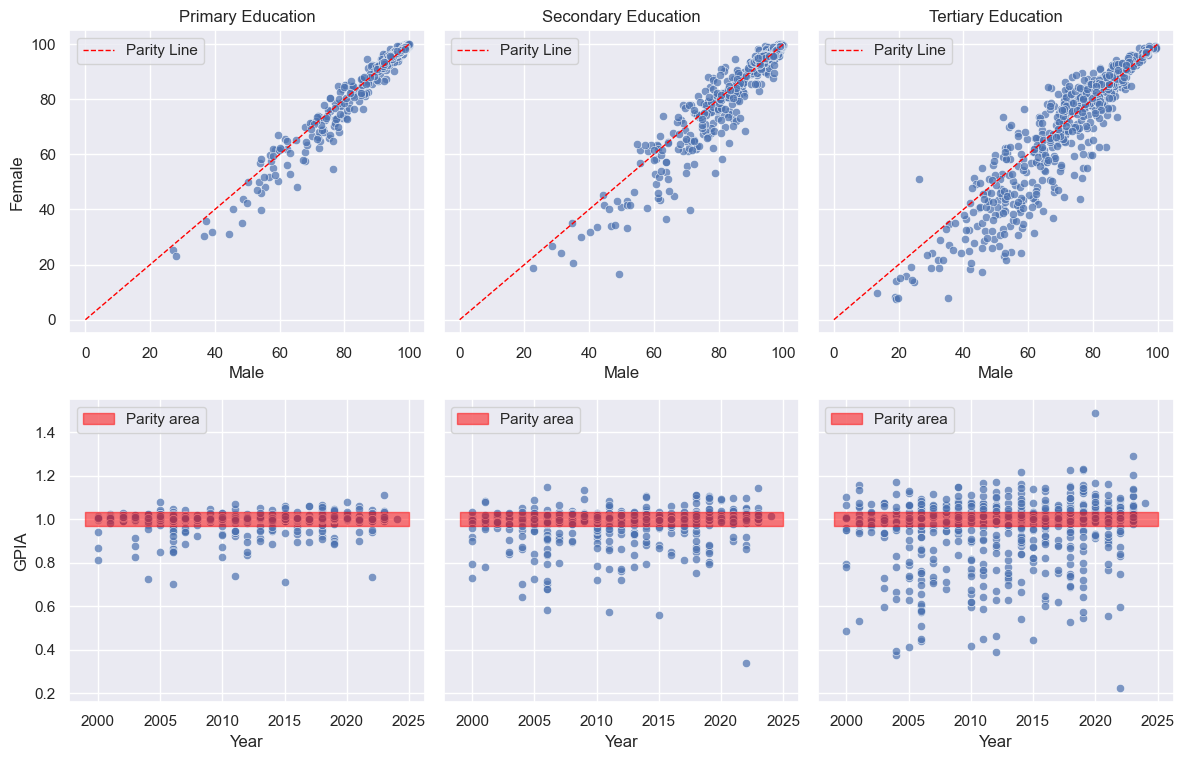

In [8]:
# Imposta la figura e i subplot
fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharex='row', sharey='row')

min_val = 0
max_val = 100

# Prima riga: grafici per P, S, T
sns.scatterplot(data=P, x='NART.1.M', y='NART.1.F', ax=axes[0, 0], alpha=0.7)
axes[0, 0].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Parity Line')
axes[0, 0].set_title('Primary Education')
axes[0, 0].legend()

sns.scatterplot(data=S, x='NART.2.M', y='NART.2.F', ax=axes[0, 1], alpha=0.7)
axes[0, 1].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Parity Line')
axes[0, 1].set_title('Secondary Education')
axes[0, 1].legend()

sns.scatterplot(data=T, x='NART.3.M', y='NART.3.F', ax=axes[0, 2], alpha=0.7)
axes[0, 2].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Parity Line')
axes[0, 2].set_title('Tertiary Education')
axes[0, 2].legend()

# Seconda riga: grafici per altre variabili (esempio con GPIA)
sns.scatterplot(data=P, x='YEAR', y='NART.1.GPIA', ax=axes[1, 0], alpha=0.7)
first_year = P['YEAR'].min()-1
last_year = P['YEAR'].max()+1
axes[1,0].fill_between([first_year, last_year], 0.97, 1.03, color='red', alpha=0.5, label='Parity area')
axes[1, 0].legend(loc='upper left')

sns.scatterplot(data=S, x='YEAR', y='NART.2.GPIA', ax=axes[1, 1], alpha=0.7)
first_year = S['YEAR'].min()-1
last_year = S['YEAR'].max()+1
axes[1,1].fill_between([first_year, last_year], 0.97, 1.03, color='red', alpha=0.5, label='Parity area')
axes[1, 1].legend(loc='upper left')

sns.scatterplot(data=T, x='YEAR', y='NART.3.GPIA', ax=axes[1, 2], alpha=0.7)
first_year = T['YEAR'].min()-1
last_year = T['YEAR'].max()+1
axes[1,2].fill_between([first_year, last_year], 0.97, 1.03, color='red', alpha=0.5, label='Parity area')
axes[1, 2].legend(loc='upper left')

# Imposta i titoli degli assi
for ax in axes[0, :]:
    ax.set_xlabel('Male')
    ax.set_ylabel('Female')

for ax in axes[1, :]:
    ax.set_xlabel('Year')
    ax.set_ylabel('GPIA')

# Migliora il layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(image_path + 'NART_TOTAL.pdf', dpi=1200, bbox_inches='tight')
plt.show()

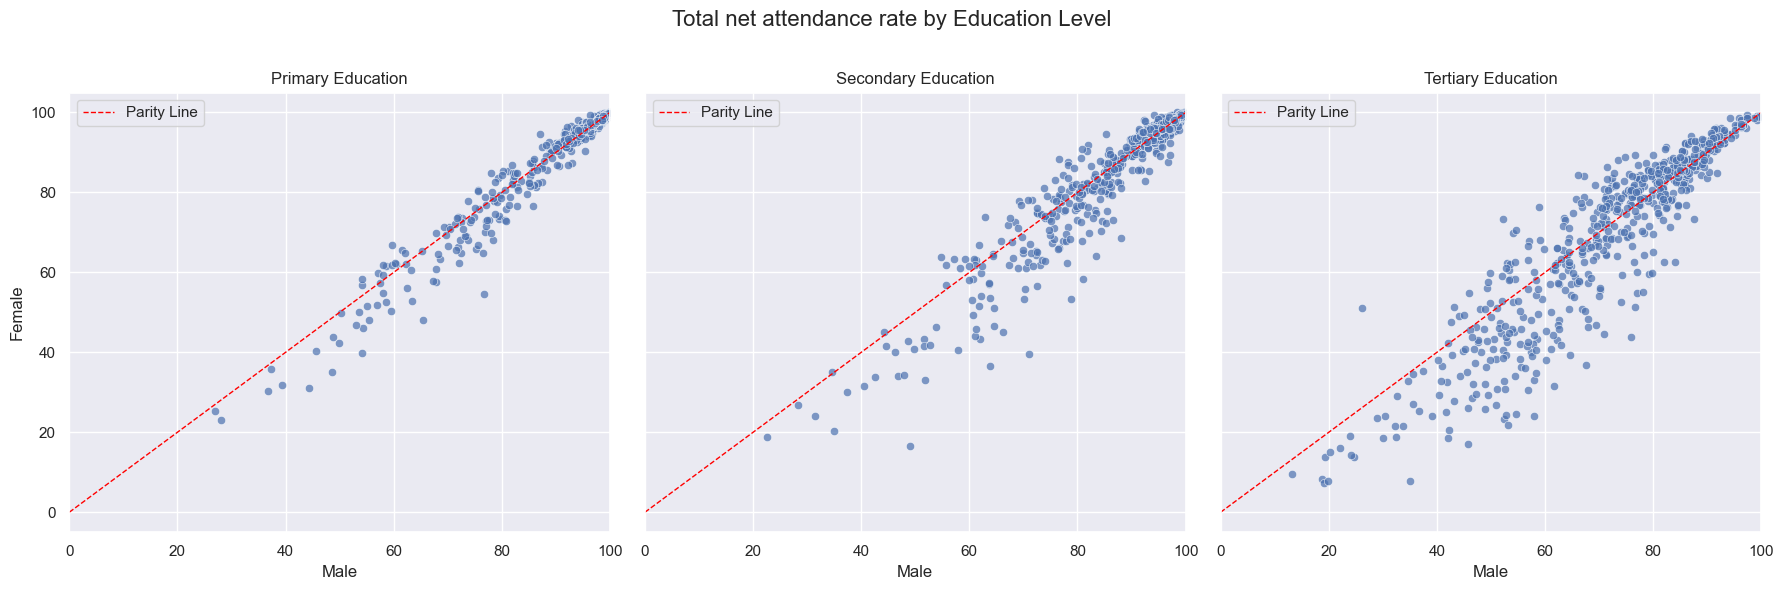

In [9]:
# Imposta la figura e i subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
fig.suptitle('Total net attendance rate by Education Level', fontsize=16)

# Grafico per P
sns.scatterplot(data=P, x='NART.1.M', y='NART.1.F', ax=axes[0], alpha=0.7)
min_val = 0
max_val = 100
axes[0].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Parity Line')
axes[0].set_title('Primary Education')
axes[0].legend()

# Grafico per S
sns.scatterplot(data=S, x='NART.2.M', y='NART.2.F', ax=axes[1], alpha=0.7)
axes[1].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Parity Line')
axes[1].set_title('Secondary Education')
axes[1].legend()

# Grafico per T
sns.scatterplot(data=T, x='NART.3.M', y='NART.3.F', ax=axes[2], alpha=0.7)
axes[2].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Parity Line')
axes[2].set_title('Tertiary Education')
axes[2].legend()

# Imposta i titoli degli assi
for ax in axes:
    ax.set_xlabel('Male')
    ax.set_ylabel('Female')
    ax.set_xlim(0, 100)

# Mostra il grafico
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

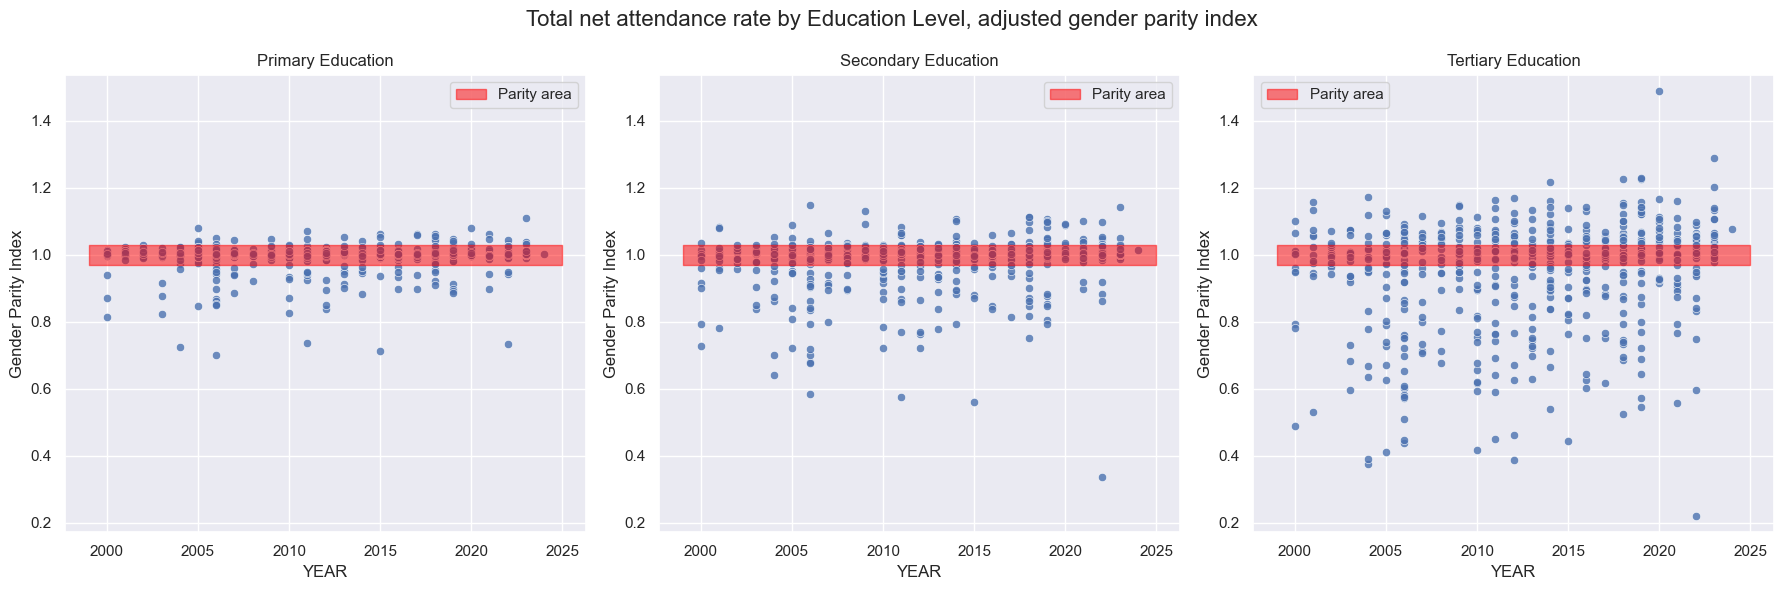

In [10]:
# Imposta la figura e i subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=False, sharey=False)
fig.suptitle('Total net attendance rate by Education Level, adjusted gender parity index', fontsize=16)

# Grafico per P
sns.scatterplot(data=P, x='YEAR', y='NART.1.GPIA', ax=axes[0], alpha=0.8)
first_year = P['YEAR'].min()-1
last_year = P['YEAR'].max()+1
axes[0].fill_between([first_year, last_year], 0.97, 1.03, color='red', alpha=0.5, label='Parity area')
axes[0].set_title('Primary Education')
axes[0].legend()

# Grafico per S
sns.scatterplot(data=S, x='YEAR', y='NART.2.GPIA', ax=axes[1], alpha=0.8)
first_year = S['YEAR'].min()-1
last_year = S['YEAR'].max()+1
axes[1].fill_between([first_year, last_year], 0.97, 1.03, color='red', alpha=0.5, label='Parity area')
axes[1].set_title('Secondary Education')
axes[1].legend()

# Grafico per T
sns.scatterplot(data=T, x='YEAR', y='NART.3.GPIA', ax=axes[2], alpha=0.8)
first_year = T['YEAR'].min()-1
last_year = T['YEAR'].max()+1
axes[2].fill_between([first_year, last_year], 0.97, 1.03, color='red', alpha=0.5, label='Parity area')
axes[2].set_title('Tertiary Education')
axes[2].legend()

y_max = max(P['NART.1.GPIA'].max(), S['NART.2.GPIA'].max(), T['NART.3.GPIA'].max())+0.05
y_min = min(P['NART.1.GPIA'].min(), S['NART.2.GPIA'].min(), T['NART.3.GPIA'].min())-0.05

# Imposta i titoli degli assi
for ax in axes:
    ax.set_xlabel('YEAR')
    ax.set_ylabel('Gender Parity Index')
    ax.set_ylim(y_min, y_max)

# Mostra il grafico
plt.tight_layout()
plt.show()

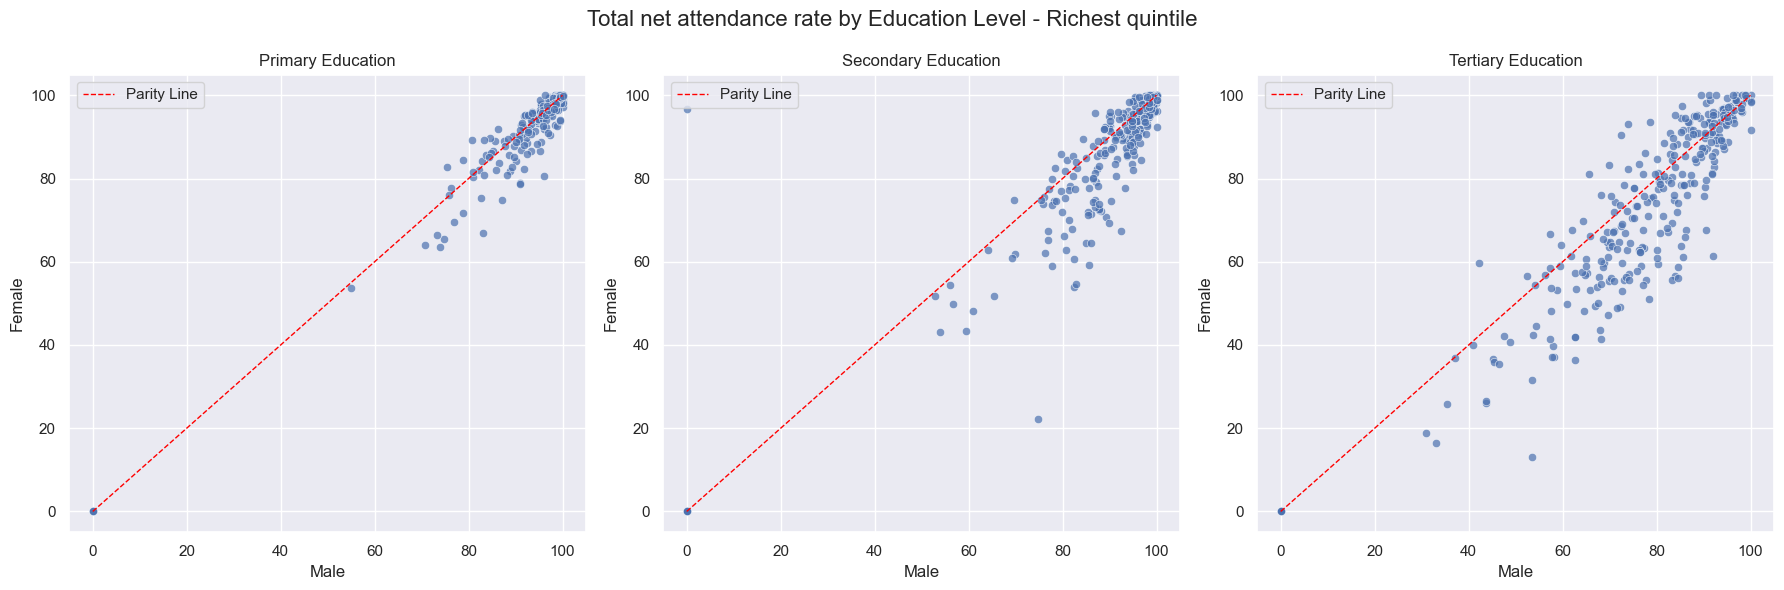

In [11]:
# Imposta la figura e i subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=False, sharey=False)
fig.suptitle('Total net attendance rate by Education Level - Richest quintile', fontsize=16)

# Grafico per P
sns.scatterplot(data=P, x='NART.1.Q5.M', y='NART.1.Q5.F', ax=axes[0], alpha=0.7)
min_val = min(P['NART.1.Q5.M'].min(), P['NART.1.Q5.F'].min())
max_val = max(P['NART.1.Q5.M'].max(), P['NART.1.Q5.F'].max())
axes[0].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Parity Line')
axes[0].set_title('Primary Education')
axes[0].legend()

# Grafico per S
sns.scatterplot(data=S, x='NART.2.Q5.M', y='NART.2.Q5.F', ax=axes[1], alpha=0.7)
min_val = min(S['NART.2.Q5.M'].min(), S['NART.2.Q5.F'].min())
max_val = max(S['NART.2.Q5.M'].max(), S['NART.2.Q5.F'].max())
axes[1].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Parity Line')
axes[1].set_title('Secondary Education')
axes[1].legend()

# Grafico per T
sns.scatterplot(data=T, x='NART.3.Q5.M', y='NART.3.Q5.F', ax=axes[2], alpha=0.7)
min_val = min(T['NART.3.Q5.M'].min(), T['NART.3.Q5.F'].min())
max_val = max(T['NART.3.Q5.M'].max(), T['NART.3.Q5.F'].max())
axes[2].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Parity Line')
axes[2].set_title('Tertiary Education')
axes[2].legend()

# Imposta i titoli degli assi
for ax in axes:
    ax.set_xlabel('Male')
    ax.set_ylabel('Female')

# Mostra il grafico
plt.tight_layout()
plt.show()

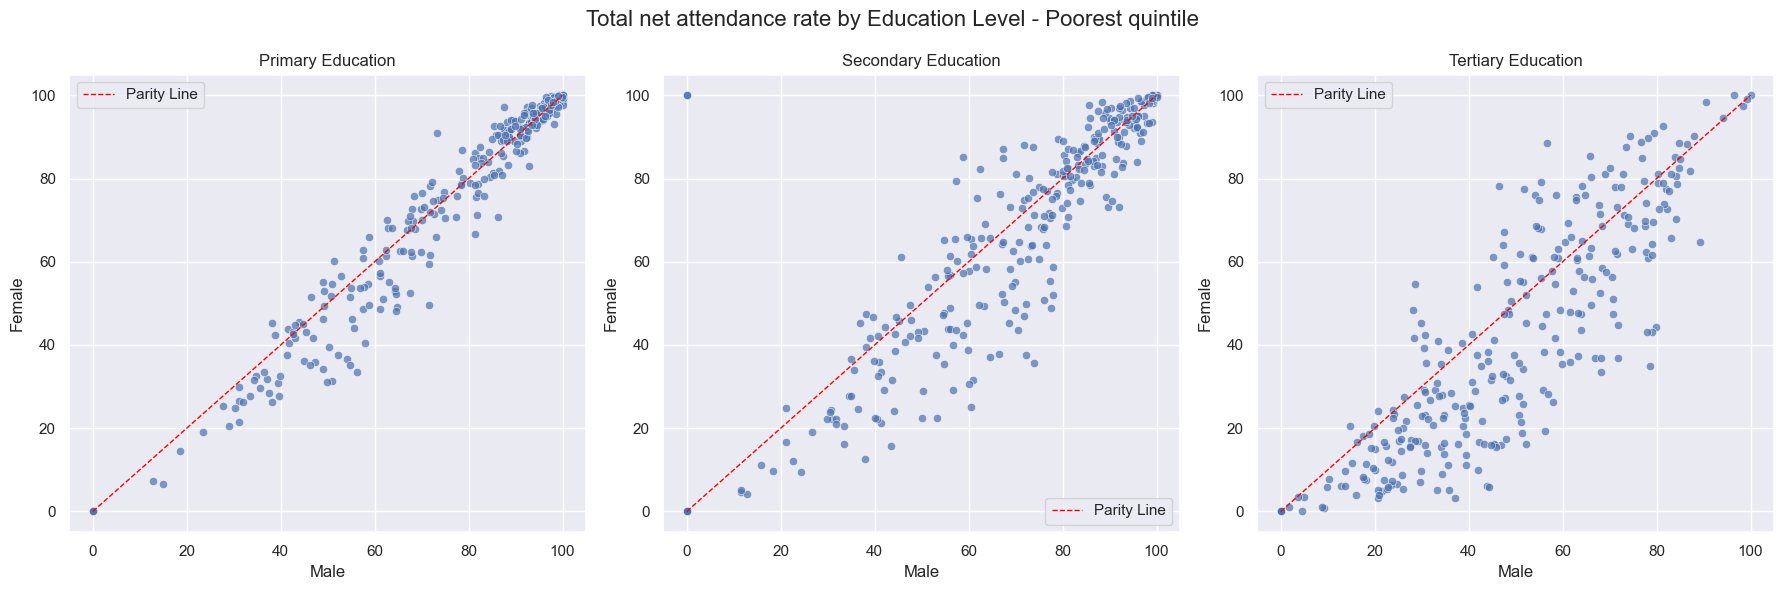

In [12]:
# Imposta la figura e i subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=False, sharey=False)
fig.suptitle('Total net attendance rate by Education Level - Poorest quintile', fontsize=16)

# Grafico per P
sns.scatterplot(data=P, x='NART.1.Q1.M', y='NART.1.Q1.F', ax=axes[0], alpha=0.7)
min_val = min(P['NART.1.Q1.M'].min(), P['NART.1.Q1.F'].min())
max_val = max(P['NART.1.Q1.M'].max(), P['NART.1.Q1.F'].max())
axes[0].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Parity Line')
axes[0].set_title('Primary Education')
axes[0].legend()

# Grafico per S
sns.scatterplot(data=S, x='NART.2.Q1.M', y='NART.2.Q1.F', ax=axes[1], alpha=0.7)
min_val = min(S['NART.2.Q1.M'].min(), S['NART.2.Q1.F'].min())
max_val = max(S['NART.2.Q1.M'].max(), S['NART.2.Q1.F'].max())
axes[1].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Parity Line')
axes[1].set_title('Secondary Education')
axes[1].legend()

# Grafico per T
sns.scatterplot(data=T, x='NART.3.Q1.M', y='NART.3.Q1.F', ax=axes[2], alpha=0.7)
min_val = min(T['NART.3.Q1.M'].min(), T['NART.3.Q1.F'].min())
max_val = max(T['NART.3.Q1.M'].max(), T['NART.3.Q1.F'].max())
axes[2].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Parity Line')
axes[2].set_title('Tertiary Education')
axes[2].legend()

# Imposta i titoli degli assi
for ax in axes:
    ax.set_xlabel('Male')
    ax.set_ylabel('Female')

# Mostra il grafico
plt.tight_layout()
plt.show()

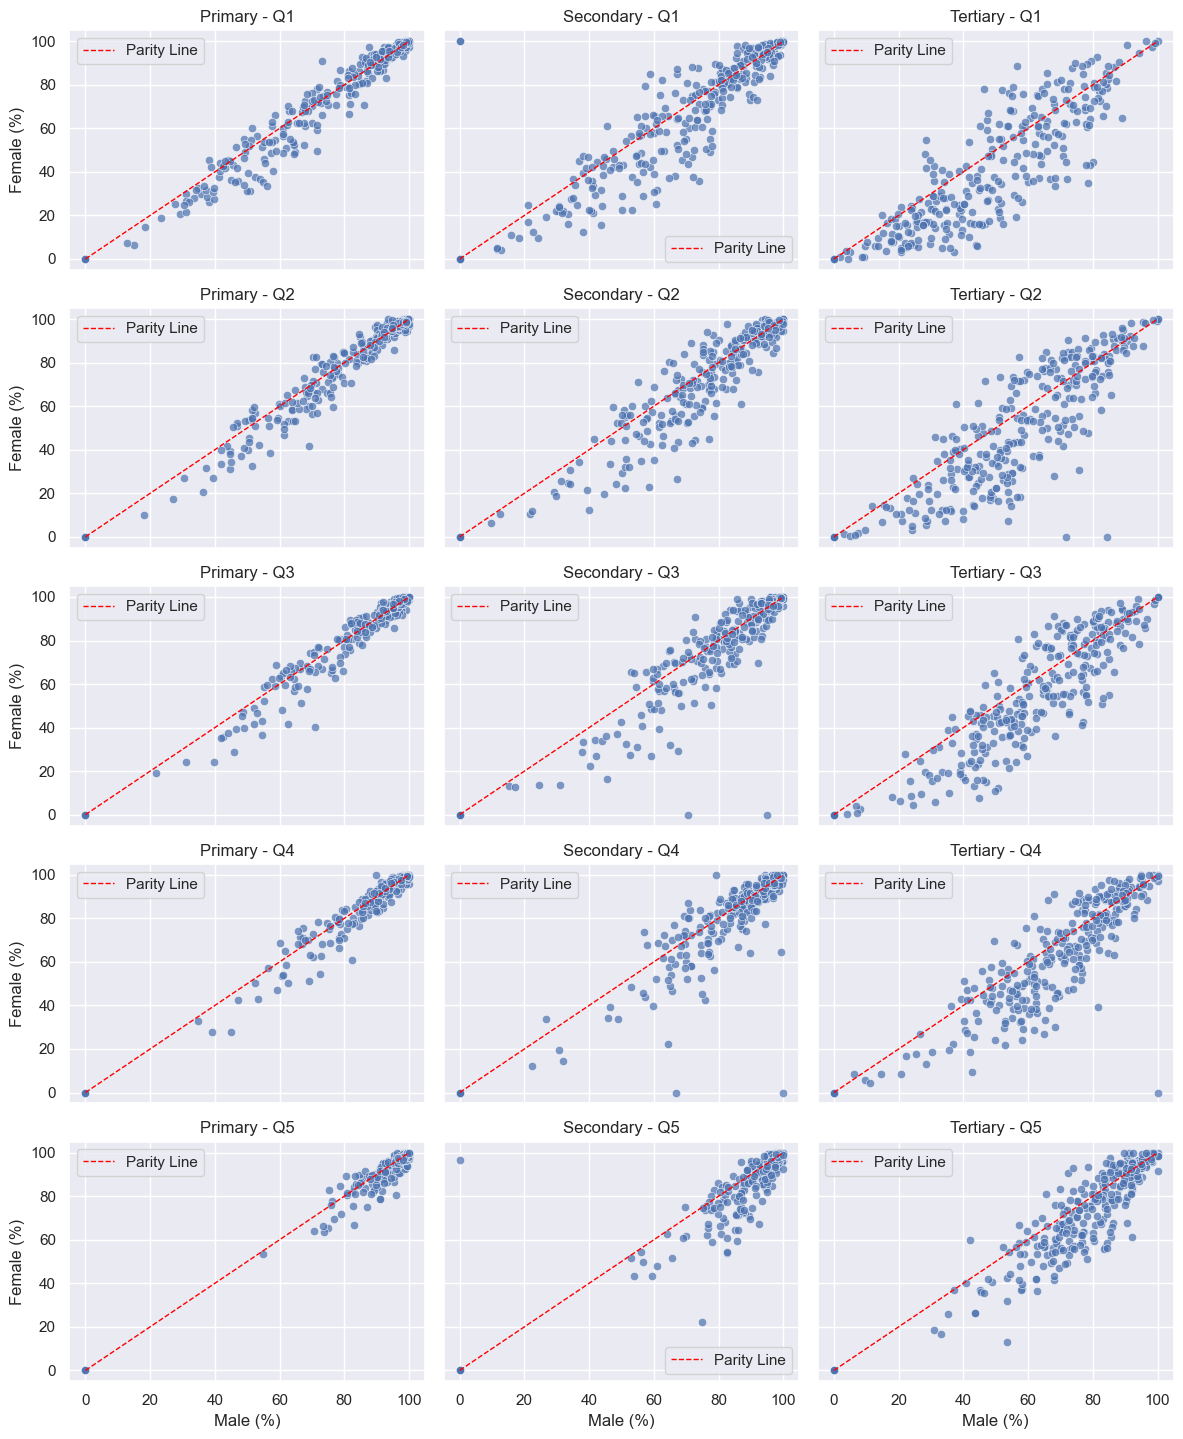

In [13]:
# Setup
fig, axes = plt.subplots(5, 3, figsize=(12, 15), sharex=True, sharey=True)

quintiles = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
education_labels = ['Primary', 'Secondary', 'Tertiary']
dfs = [P, S, T]  # i tuoi dataframe
min_val, max_val = 0, 100

# Loop sui quintili (righe) e livelli scolastici (colonne)
for i, q in enumerate(quintiles):
    for j, (df, label) in enumerate(zip(dfs, education_labels)):
        x_col = f'NART.{j+1}.{q}.M'
        y_col = f'NART.{j+1}.{q}.F'
        
        sns.scatterplot(data=df, x=x_col, y=y_col, ax=axes[i, j], alpha=0.7)
        axes[i, j].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Parity Line')
        axes[i, j].set_title(f'{label} - {q}')
        axes[i, j].legend()
        
        if j == 0:
            axes[i, j].set_ylabel('Female (%)')
        if i == 4:
            axes[i, j].set_xlabel('Male (%)')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(image_path + 'NART_Q.pdf', dpi=1200, bbox_inches='tight')
plt.show()